In [1]:
import pandas as pd           
import matplotlib.pyplot as plt 
import seaborn as sns         
import plotly.express as px   
import random 
import numpy as np


In [2]:
#Task 1
try:
    data = pd.read_csv("owid-covid-data.csv")
    print("Dataset read successfully.")
except Exception as e:
    print("Error reading dataset:", e)

Dataset read successfully.


In [3]:
#showcasing columns
data.columns.tolist()


['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinate

In [4]:
#Preview the rows
data.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1      AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN                597.029   
1        1803.987              NaN                597.029   
2        1803.987              NaN                597.029   
3        1803.987              NaN                597.029   
4        1803.987              NaN                597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             NaN           NaN                  37.746   
1                 9.59             NaN           NaN                  37.746   
2                 9.59             NaN           NaN                  37.746   
3                 9.59             NaN           NaN                  37.746   
4                 9.59             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  
0                         0.5            64.83                    0.511  
1                         0.5            64.83                    0.511  
2                         0.5            64.83                    0.511  
3                         0.5            64.83                    0.511  
4                         0.5            64.83                    0.511  

[5 rows x 59 columns]

In [5]:
#Identify missing values
data.isnull().sum()

iso_code                                     0
continent                                 4327
location                                     0
date                                         0
total_cases                               2690
new_cases                                 2691
new_cases_smoothed                        3698
total_deaths                             12542
new_deaths                               12384
new_deaths_smoothed                       3698
total_cases_per_million                   3163
new_cases_per_million                     3164
new_cases_smoothed_per_million            4166
total_deaths_per_million                 13002
new_deaths_per_million                   12844
new_deaths_smoothed_per_million           4166
reproduction_rate                        17659
icu_patients                             81850
icu_patients_per_million                 81850
hosp_patients                            79611
hosp_patients_per_million                79611
weekly_icu_ad

In [6]:
#Data Cleaning - Task 2
filtered_data = data[data['location'].isin(['Russia', 'Canada', 'Kenya', 'China', 'Australia'])]
print('Filtered countries:', filtered_data)

Filtered countries:       iso_code continent   location        date  total_cases  new_cases  \
4760       AUS   Oceania  Australia  2020-01-26          4.0        4.0   
4761       AUS   Oceania  Australia  2020-01-27          5.0        1.0   
4762       AUS   Oceania  Australia  2020-01-28          5.0        0.0   
4763       AUS   Oceania  Australia  2020-01-29          6.0        1.0   
4764       AUS   Oceania  Australia  2020-01-30          9.0        3.0   
...        ...       ...        ...         ...          ...        ...   
68027      RUS    Europe     Russia  2021-05-20    4917906.0     9112.0   
68028      RUS    Europe     Russia  2021-05-21    4926717.0     8811.0   
68029      RUS    Europe     Russia  2021-05-22    4935302.0     8585.0   
68030      RUS    Europe     Russia  2021-05-23    4944129.0     8827.0   
68031      RUS    Europe     Russia  2021-05-24    4952412.0     8283.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  

In [7]:
clean_data = data.dropna(subset=['date'])
print('Data without null dates', clean_data)

Data without null dates       iso_code continent     location        date  total_cases  new_cases  \
0          AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1          AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2          AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3          AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4          AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   
...        ...       ...          ...         ...          ...        ...   
91021      ZWE    Africa     Zimbabwe  2021-05-20      38635.0       23.0   
91022      ZWE    Africa     Zimbabwe  2021-05-21      38664.0       29.0   
91023      ZWE    Africa     Zimbabwe  2021-05-22      38679.0       15.0   
91024      ZWE    Africa     Zimbabwe  2021-05-23      38682.0        3.0   
91025      ZWE    Africa     Zimbabwe  2021-05-24      38696.0       14.0   

       new_cases_smoothed  total_deaths  new_deaths

In [8]:
#Convert the time to datetime
data['date'] = pd.to_datetime(data['date'])
print('new dates:', data['date'])

new dates: 0       2020-02-24
1       2020-02-25
2       2020-02-26
3       2020-02-27
4       2020-02-28
           ...    
91021   2021-05-20
91022   2021-05-21
91023   2021-05-22
91024   2021-05-23
91025   2021-05-24
Name: date, Length: 91026, dtype: datetime64[ns]


In [9]:
#Handling missing values
columns = ['male_smokers']
nan_data = data[columns].fillna(0)
print('Removed NAN:', nan_data)

Removed NAN:        male_smokers
0               0.0
1               0.0
2               0.0
3               0.0
4               0.0
...             ...
91021          30.7
91022          30.7
91023          30.7
91024          30.7
91025          30.7

[91026 rows x 1 columns]


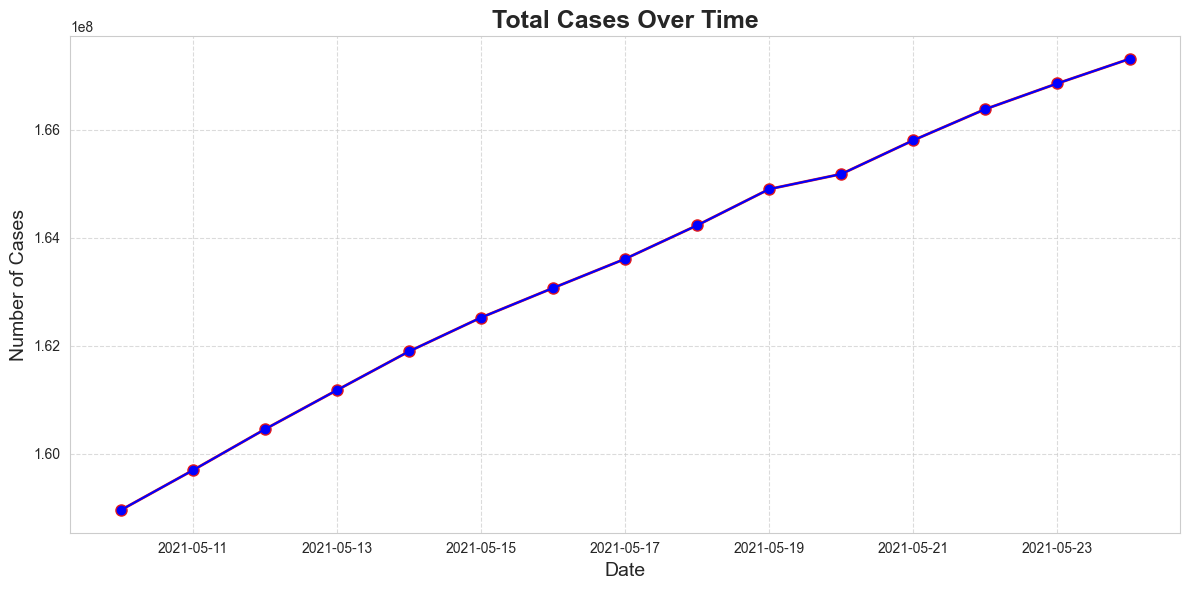

In [10]:
# Exploratory Data Analysis - Task 4
#getting the top 15
top_15 = data.nlargest(15, 'total_cases')
#Plotting a line chart for Total_Cases
sns.set_style("whitegrid") # Set the style for better visualization

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(top_15['date'], 
         top_15['total_cases'], 
         marker='o', 
         linestyle='-', 
         linewidth=2,
         color='#E41A1C',  # Red color for HIV/AIDS data
         markersize=8)
# Create the plot
plt.plot(top_15['date'], top_15['total_cases'], marker='o', linestyle='-', color='blue', label='y = 2x')

# Customize the plot
plt.title('Total Cases Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)



# Adjust layout and show plot
plt.tight_layout()
plt.show()

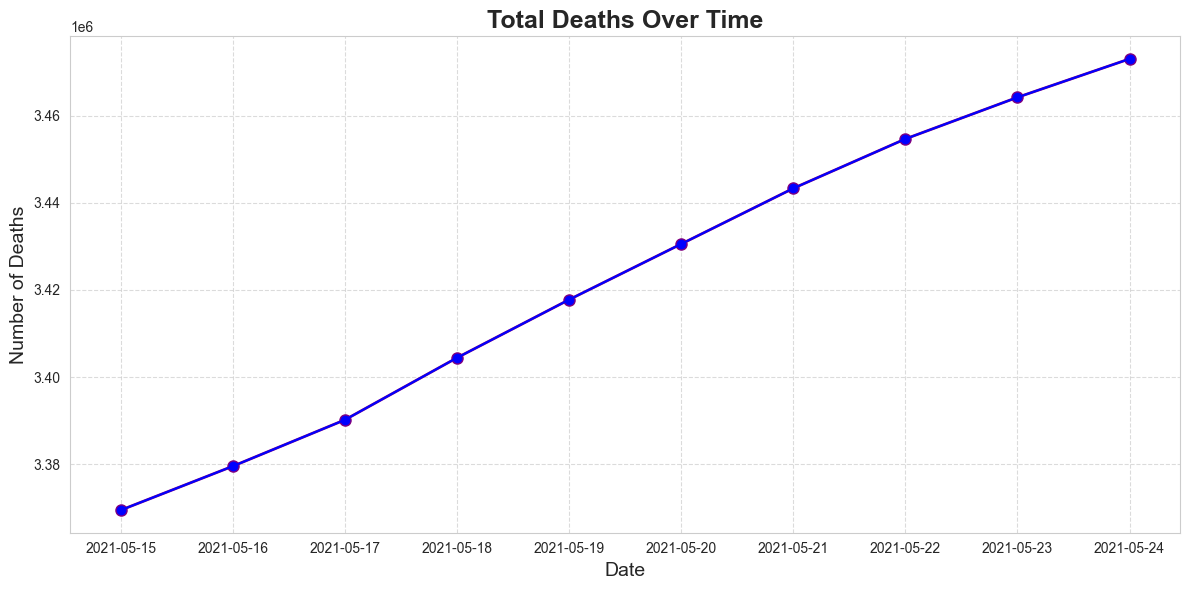

In [11]:
# Exploratory Data Analysis - Task 3
#getting the top 15
top15 = data.nlargest(10, 'total_deaths')
#Plotting a line chart for Total_Cases
sns.set_style("whitegrid") # Set the style for better visualization

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(top15['date'], 
         top15['total_deaths'], 
         marker='o', 
         linestyle='-', 
         linewidth=2,
         color='purple',  
         markersize=8)
# Create the plot
plt.plot(top15['date'], top15['total_deaths'], marker='o', linestyle='-', color='blue', label='y = 2x')

# Customize the plot
plt.title('Total Deaths Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Deaths', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)



# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [12]:
# See the latest date and preview what's there
latest_date = data['date'].max()
latest_data = data[data['date'] == latest_date]

# Check if 'total_cases' exists and has non-null values
print(f"Latest date in data: {latest_date}")
print(f"Total rows on that date: {len(latest_data)}")
print(f"Rows with non-null total_cases: {latest_data['total_cases'].notna().sum()}")


Latest date in data: 2021-05-25 00:00:00
Total rows on that date: 1
Rows with non-null total_cases: 0


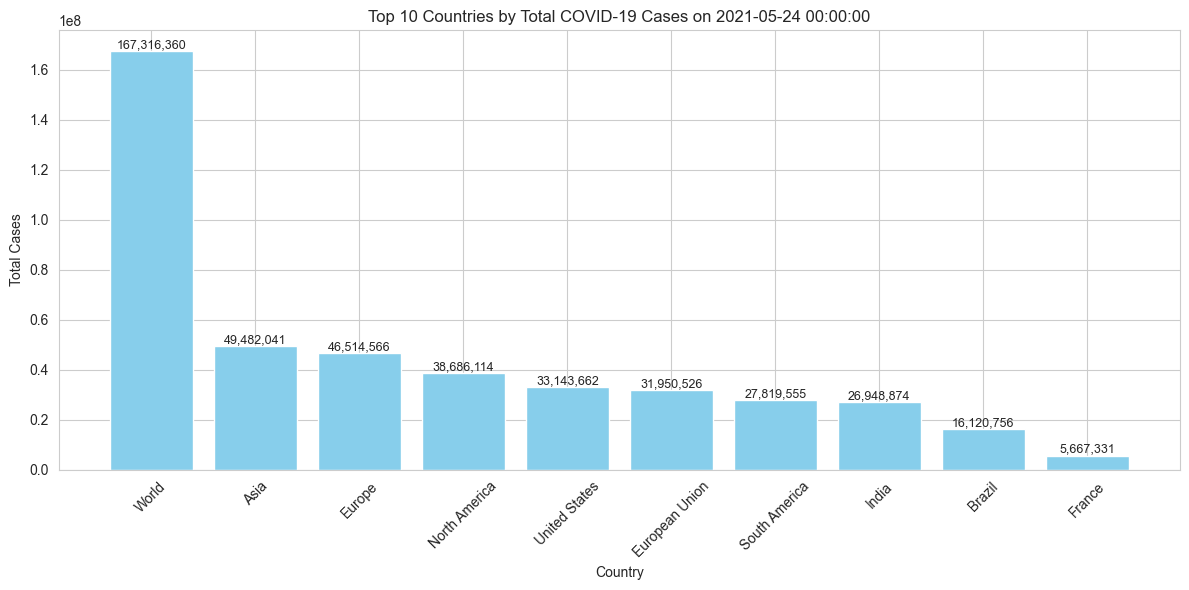

In [13]:
# Step 1: Filter out rows where total_cases is missing
valid_data = data[data['total_cases'].notna()]

# Step 2: Get the latest date where total_cases exists
latest_valid_date = valid_data['date'].max()
latest_valid_data = valid_data[valid_data['date'] == latest_valid_date]

# Step 3: Get top 10 countries by total_cases
top_ten = latest_valid_data.sort_values(by='total_cases', ascending=False).head(10)

# Step 4: Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bars = plt.bar(top_ten['location'], top_ten['total_cases'], color='skyblue')
plt.title(f'Top 10 Countries by Total COVID-19 Cases on {latest_valid_date}')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()

# Add value labels on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{int(height):,}', ha='center', va='bottom', fontsize=9)

plt.show()


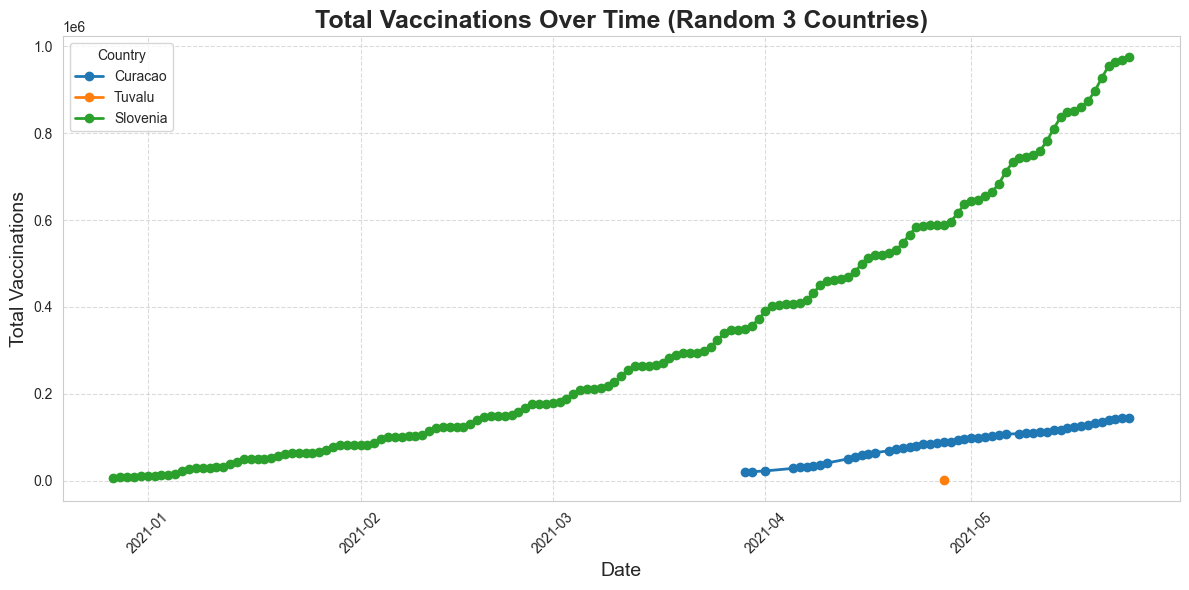

Randomly selected countries: ['Curacao', 'Tuvalu', 'Slovenia']


In [14]:
#Visualizing Vaccination Progress - Task4

# Filter out rows with valid total vaccinations
valid_vaccine = data[data['total_vaccinations'].notna()]

# Get a list of all countries with at least some vaccination data
all_countries = valid_vaccine['location'].unique().tolist()

# Pick 3 countries at random
random_countries = random.sample(all_countries, 3)

# Filter the data for these countries
random_data = valid_vaccine[valid_vaccine['location'].isin(random_countries)]

# Plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

for country in random_countries:
    country_data = random_data[random_data['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'],
             label=country, linewidth=2, marker='o')

# Customize
plt.title('Total Vaccinations Over Time (Random 3 Countries)', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Vaccinations', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Show the selected countries
print("Randomly selected countries:", random_countries)



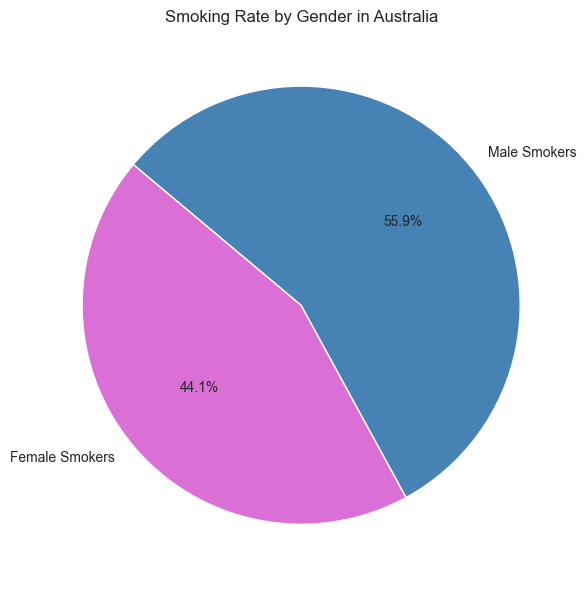

Randomly selected country: Australia


In [15]:
# Drop rows with missing smoking data
smoking_data = data.dropna(subset=['female_smokers', 'male_smokers'])

# Select a random country from the remaining data
random_country = smoking_data.sample(1).iloc[0]

# Extract values
country_name = random_country['location']
female_rate = float(random_country['female_smokers'])
male_rate = float(random_country['male_smokers'])

# Prepare pie chart
labels = ['Female Smokers', 'Male Smokers']
sizes = [female_rate, male_rate]
colors = ['orchid', 'steelblue']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title(f'Smoking Rate by Gender in {country_name}')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Print the country name for reference
print(f"Randomly selected country: {country_name}")


In [16]:
#Build a Choropleth Map - Task 5

# Filter the DataFrame to only include rows from the latest date
new_dates = data['date'].max()
new_dates = data[data['date'] == new_dates]

# Select only 'iso_code' and 'total_cases' columns
new_df = new_dates[['iso_code', 'total_cases']]

# Reseting index for cleaner output
new_df = new_df.reset_index(drop=True)

# Display the DataFrame
print('New dataframe is:', new_df)

New dataframe is:   iso_code  total_cases
0      ISR          NaN


In [19]:
#Create a cloropeth graph
#Drop rows with missing data
data_na = data.dropna(subset=['iso_code', 'total_cases', 'population']).copy()

# Calculate case density (cases per 100k people)
data_na['case_density_per_100k'] = (data_na['total_cases'] / data_na['population']) * 100000

# Plot a choropleth map
fig = px.choropleth(
    data_na,
    locations="iso_code",
    color="case_density_per_100k",  # or change to 'people_fully_vaccinated_per_hundred' for vaccination rates
    hover_name="location",
    color_continuous_scale="Reds",
    title="COVID-19 Case Density per 100k People (Latest Date)",
)

fig.show()
